In [ ]:
import statsmodels.api as smf
import statsmodels.formula.api as smf

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("whitegrid")
from matplotlib import pyplot as plt
import gc


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

sns.__version__

'0.9.0'

## Quinto Andar Adivinhador de Aluguel 

In [ ]:
#Propaganda do Quinto Andar

#https://mkt.quintoandar.com.br/quanto-cobrar-de-aluguel/

In [ ]:
df=pd.read_csv("house_sales.csv",sep=",")

In [ ]:
df.head(1)

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,221900,3,1.0,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650


# Data exploration

### Meaning of each column in the CSV file

- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

In [ ]:
#Este arquivo originamente conta com 18448 linhas e 16 colunas)
df.shape

(18448, 16)

In [ ]:
#Pode-se notar números contínuos em variáveis que no bom-senso deveriam ser inteiros, tais como número de banheiros
df.head(5)

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503


In [ ]:
#Todas as variáveis são numéricas ainda que algumas sejam categoricas, tais como is_waterfront e condition

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 16 columns):
price                       18448 non-null int64
num_bed                     18448 non-null int64
num_bath                    18448 non-null float64
size_house                  18448 non-null int64
size_lot                    18448 non-null int64
num_floors                  18448 non-null float64
is_waterfront               18448 non-null int64
condition                   18448 non-null int64
size_basement               18448 non-null int64
year_built                  18448 non-null int64
renovation_date             18448 non-null int64
zip                         18448 non-null int64
latitude                    18448 non-null float64
longitude                   18448 non-null float64
avg_size_neighbor_houses    18448 non-null int64
avg_size_neighbor_lot       18448 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.3 MB


In [ ]:
#Price possui obliquidade para direita, possivelmente há casas com preços muito acima da média e que podem ser candidatos a serem outliers  
#Como suspeitado, num_bath e num_floor possuem valores contínuos para um fator discreto - pode-se notar isso nos valores dos quartis 1.750000	

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,18448.0,542362.371314,372013.519039,78000.000000,321837.500000,450000.000000,648000.000000,7.700000e+06
num_bed,18448.0,3.372615,0.933892,0.000000,3.000000,3.000000,4.000000,3.300000e+01
num_bath,18448.0,2.118888,0.772384,0.000000,1.750000,2.250000,2.500000,8.000000e+00
size_house,18448.0,2083.940915,921.416218,290.000000,1430.000000,1920.000000,2560.000000,1.354000e+04
size_lot,18448.0,15036.024068,41814.548966,520.000000,5050.000000,7600.500000,10625.250000,1.651359e+06
num_floors,18448.0,1.494606,0.540806,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,18448.0,0.007643,0.087092,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,18448.0,3.411698,0.652593,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,18448.0,293.571498,443.607503,0.000000,0.000000,0.000000,570.000000,4.820000e+03
year_built,18448.0,1971.001138,29.361619,1900.000000,1952.000000,1975.000000,1997.000000,2.015000e+03


In [ ]:
#Valor únicos apresentados nessas duas variáveis

print("Valores únicos para número de banheiros" + str(df["num_bath"].unique()))

print("Valores únicos para número de andares" + str(df["num_floors"].unique()))

Valores únicos para número de banheiros[1.   2.25 3.   2.   4.5  2.5  1.75 2.75 1.5  3.25 3.5  0.75 4.   4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   5.5  6.75 5.75 8.   7.5  7.75 0.5
 6.25 6.5 ]
Valores únicos para número de andares[1.  2.  1.5 3.  2.5 3.5]


In [ ]:
#arrendondamento dos valores para as respectivas variáveis

df["num_bath"]=df["num_bath"].round()
df["num_floors"]=df["num_floors"].round()

In [ ]:
#Interesse para descobrir qual é o ano mais recente listado nessa base

print("Ano máximo de cadastro considerando idade construida e reformada :" )
print(df["year_built"].max(),df["renovation_date"].max())

Ano máximo de cadastro considerando idade construida e reformada :
2015 2015


In [ ]:
#Modificação e criação de novas variáveis

#A variável #renovated? (yes or no) é binária e mostra se ela foi ou nunca foi reformada 

df["renovated?"]=df["renovation_date"].apply(lambda x: 1 if x!=0 else 0)


#A variável recent_year coloca nela qual é o ano do imóvel, sendo que considera o ano de renovação caso haja

df["recent_year"]=0

df["recent_year"] = df.loc[df["renovation_date"]==0,"year_built"]

df.loc[df["renovation_date"] != 0,"recent_year"]=df.loc[df["renovation_date"] != 0 ,"renovation_date"]


#A variável existence_year calcula a diferença entre o ano mais recente da base(2015) e a idade do imóvel (recent_year) 

df["existence_year"]=2015-df["recent_year"]


#Por fim, deleto os valores antigos

#drop old values

df=df.drop(columns=["year_built","renovation_date"])


In [ ]:
#Base limpa e bem comportada - Não há nenhum NA

df.isna().sum()

price                       0
num_bed                     0
num_bath                    0
size_house                  0
size_lot                    0
num_floors                  0
is_waterfront               0
condition                   0
size_basement               0
zip                         0
latitude                    0
longitude                   0
avg_size_neighbor_houses    0
avg_size_neighbor_lot       0
renovated?                  0
recent_year                 0
existence_year              0
dtype: int64

# Visual exploration of data

### D_frame sem tratamento de outliers

In [ ]:
#Seleção das variáveis para serem utilizadas conforme seu tipo : numéricou ou categórico

param_cat=["is_waterfront","condition","zip","renovated?","recent_year"]

param_num=["price",
"num_bed",
       "num_bath",
       "size_house",
       "size_lot",
       "num_floors",
       "existence_year",
       "avg_size_neighbor_houses",
       "avg_size_neighbor_lot"
          ]

[]

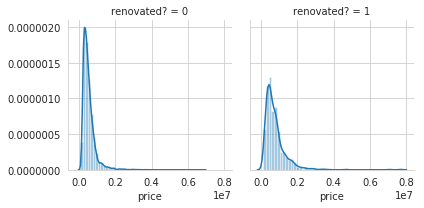

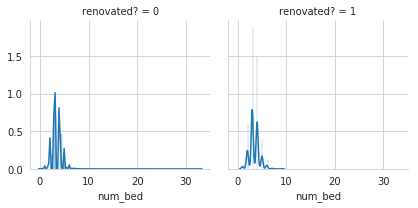

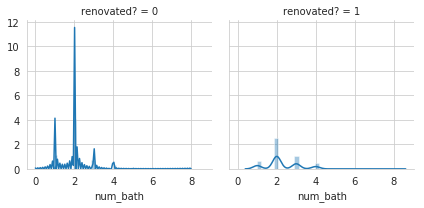

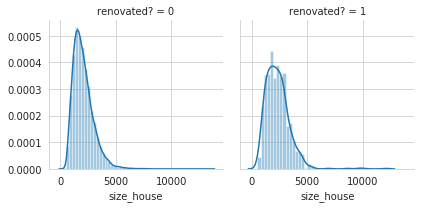

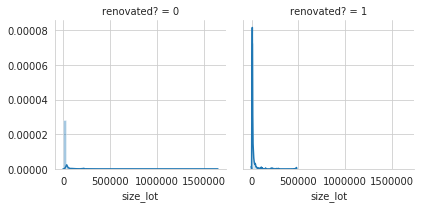

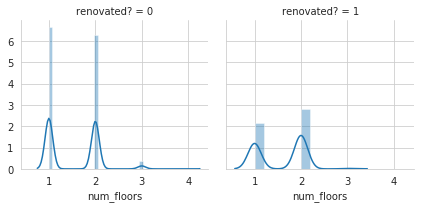

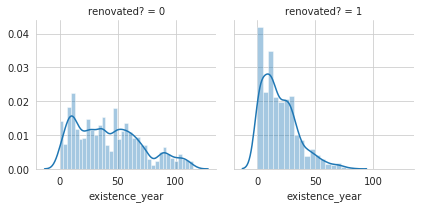

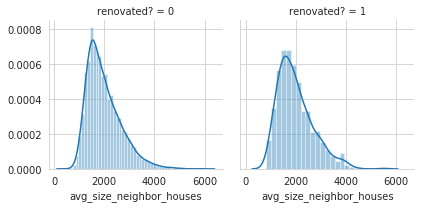

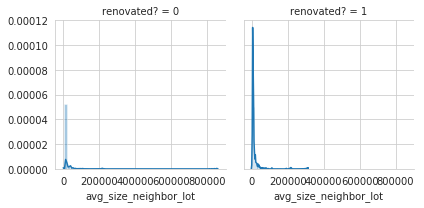

In [ ]:
#Distribuição geral dos dados

#Pode-se notar diversas distribuições (bi,normal,exponencial e triangular)

for feature in param_num:
  g = sns.FacetGrid(df,col="renovated?") 
  g.map(sns.distplot, feature) 
  
plt.plot()

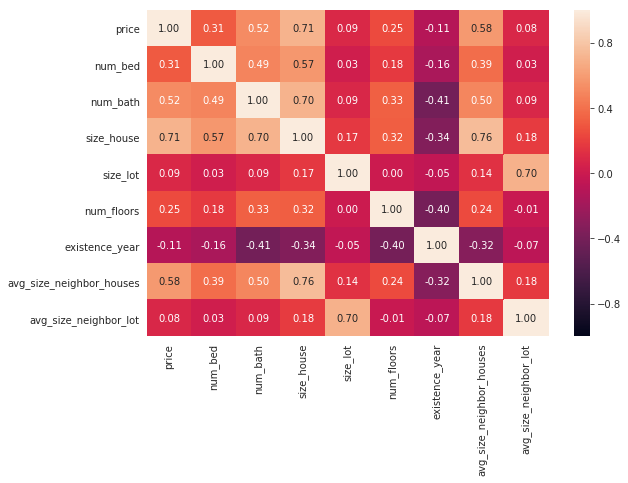

In [ ]:
#Nesta matriz de correlação podemos visualizar diversas correlações positivas e negativas entre as variáveis
#Para price, a única variável com correlação negativa é tempo de existência do imóvel. Ou seja, quanto maior o tempo de existência menor é o seu preço. 

plt.figure(figsize=(9, 6))  # Aumenta o tamanho da figura
ax=sns.heatmap(df[param_num].corr(),
    vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

<Figure size 648x432 with 0 Axes>

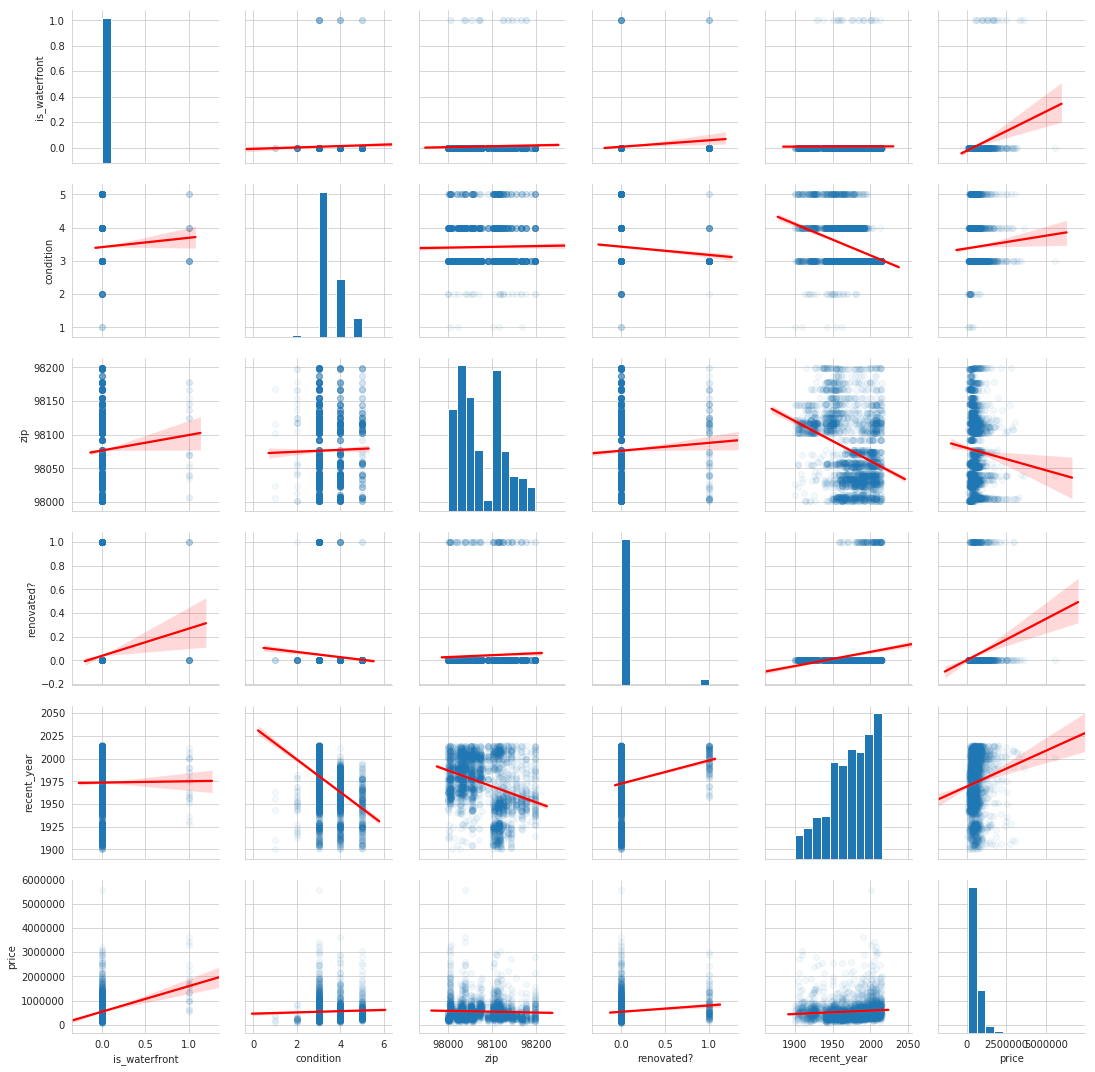

In [ ]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matriz sem tratamento de outliers para variáveis Categoricas, 
#Na última linha, nota-se water_front e renovated possuem indicação de correlação positiva com price
#Condição do imóvel e Zip apresentou correlação nula

plt.figure(figsize=(9, 6))
g = sns.pairplot(
    pd.concat([df[param_cat],df["price"]],axis=1).sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}
)


<Figure size 648x432 with 0 Axes>

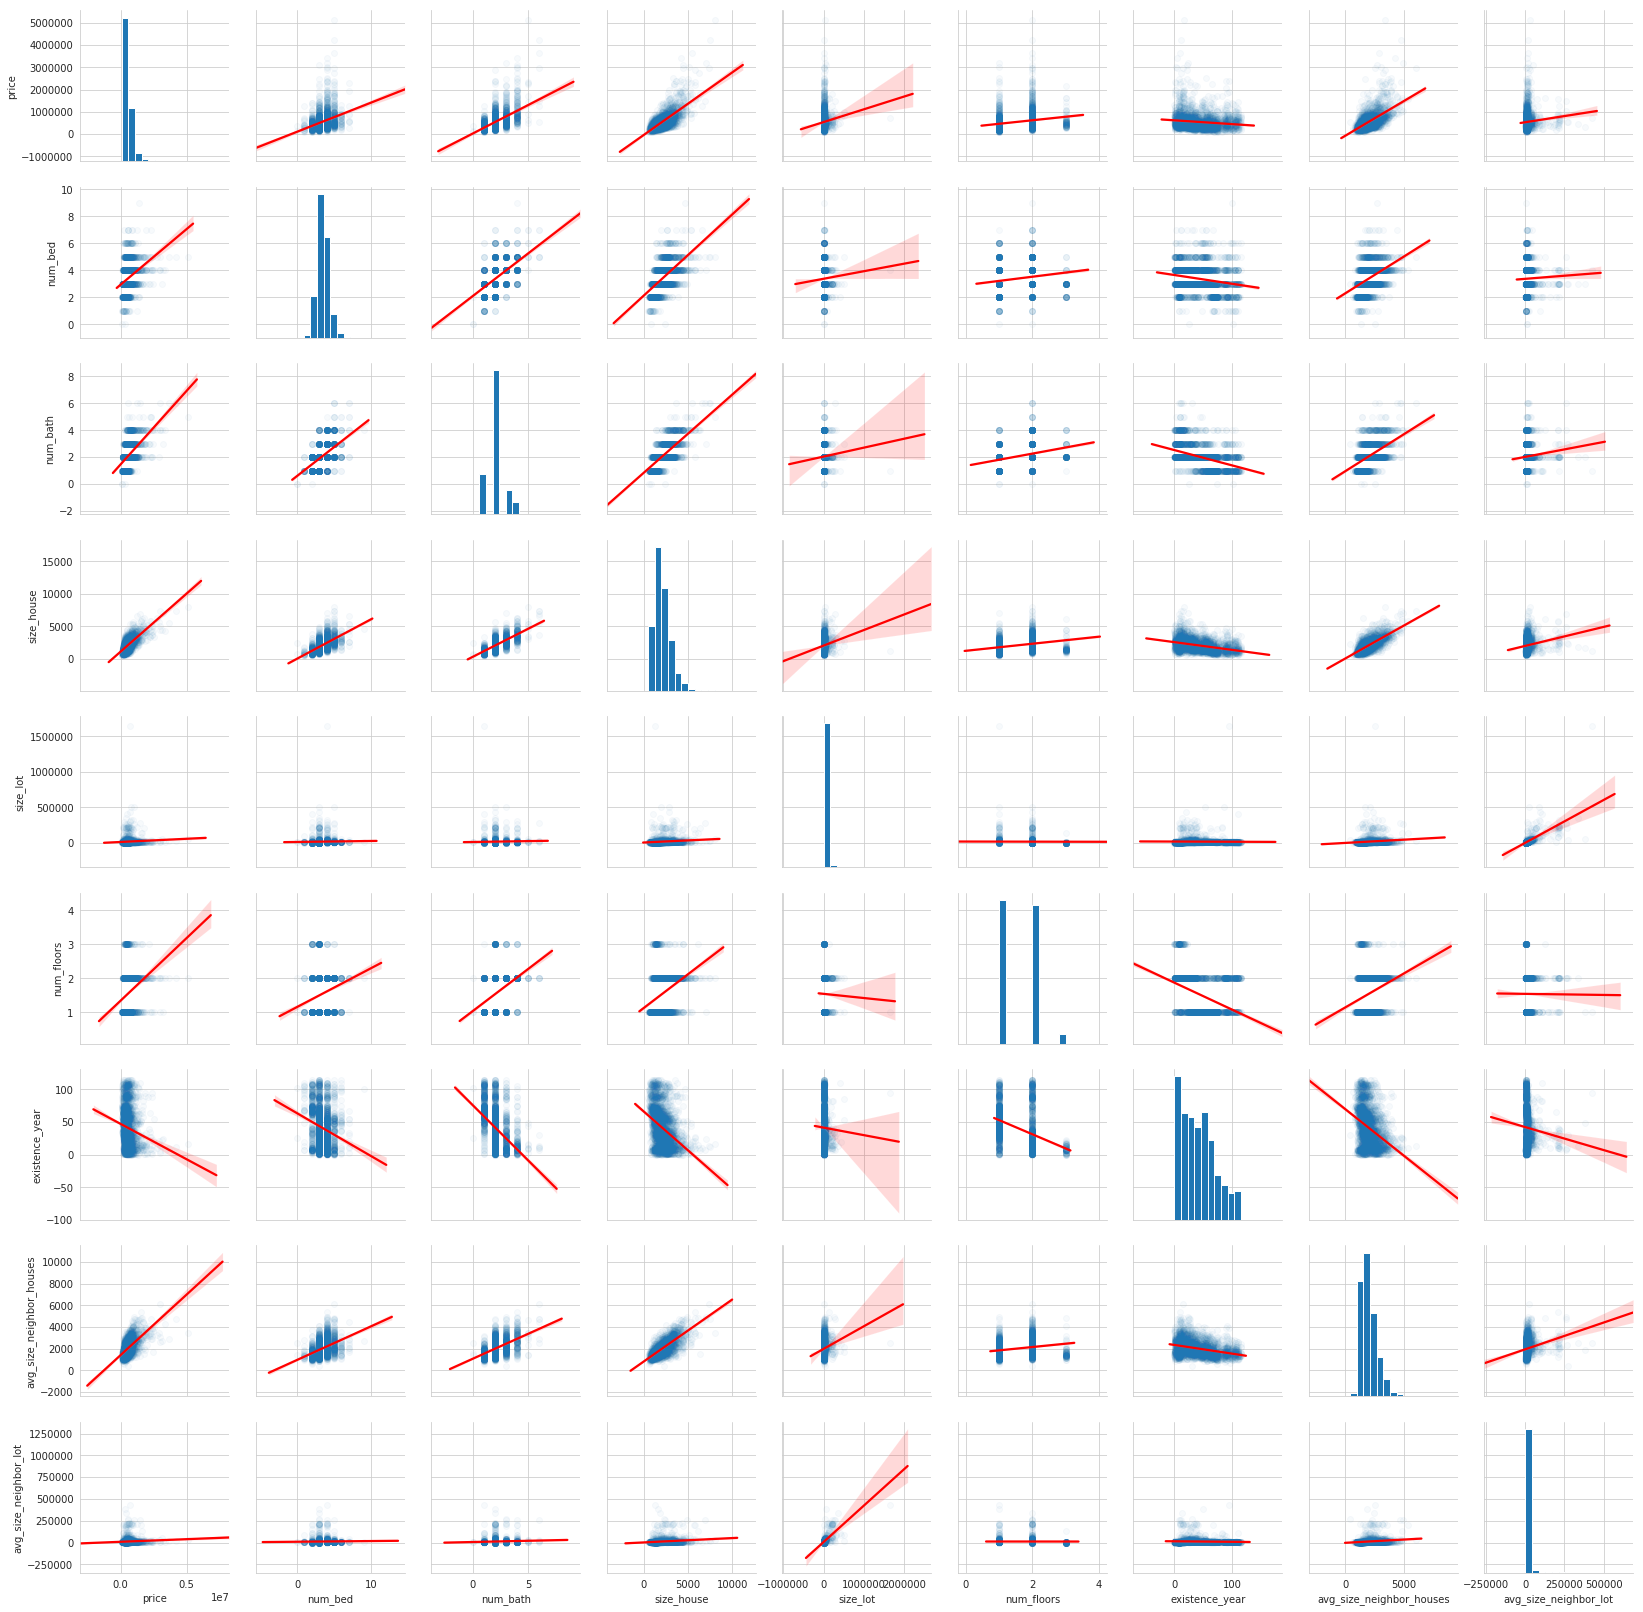

In [ ]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matriz sem tratamento de outliers para variáveis Numéricas, ao contrário da anterior
#Na primeira coluna, nota-se que quase todas as variáveis apresentam indicação positiva ou negativa correlacional,
#exceto size_lot e avg_size_neighbors. Isso significa que elas podem causar algum impacto na variável de interesse "Price"


plt.figure(figsize=(9, 6))
g = sns.pairplot(
    df[param_num].sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.03}}
)

### D_frame Com tratamento de outliers

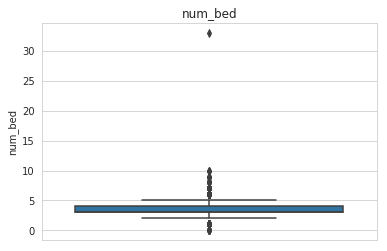

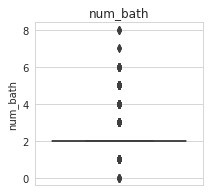

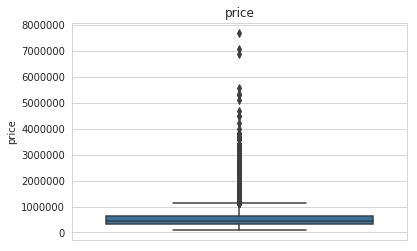

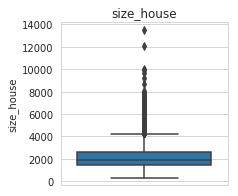

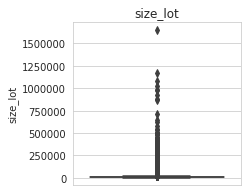

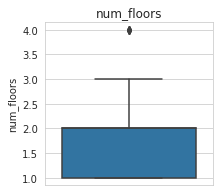

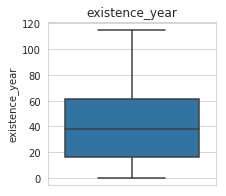

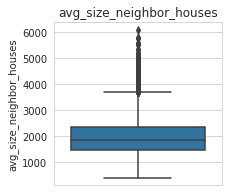

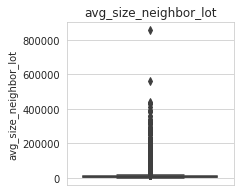

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [ ]:
#Nesta parte, ao contrário da anterior, será realizado uma varredura de outlier, 
#seu tratamento e análise visual bivariado conforme seção anterior

#Neste Boxplot univariado, pode-se notar diversos outliers

plt.title("Boxplot com outliers")
for position,feature in enumerate(param_num):  
    plt.figure(figsize=(3, 3))
    plt.figure(position)  
    plt.title(feature)
    sns.boxplot(data=df,y=feature)
    plt.plot()

In [ ]:
#A remoção de outliers empregará um intervalo de confiança de 99%

import numpy as np
from scipy import stats

df_99 = df[df[param_num].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

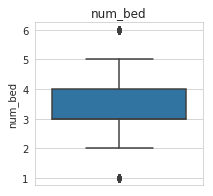

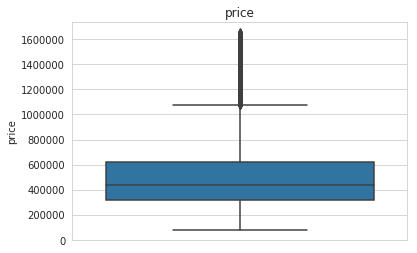

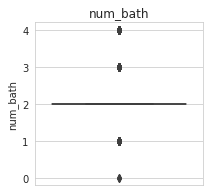

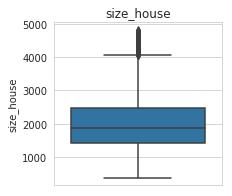

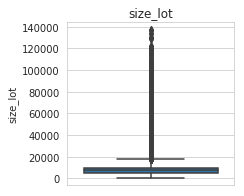

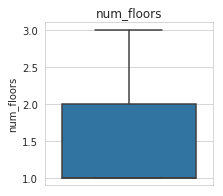

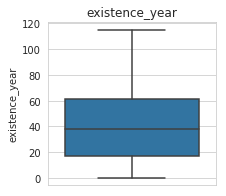

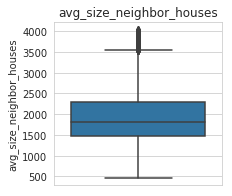

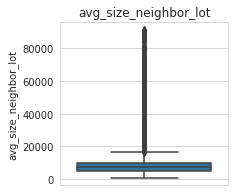

<Figure size 216x216 with 0 Axes>

In [ ]:
#Ao realizar o boxplot nesta base tratada, pode-se observar redução significativa de outliers - ainda que preço aponte inúmeras outras
#Não se aconselha remover todos os outliers pois a modelagem poderá sofrer com a entrada de outros imóveis que podem possuir este preço
#Futuramente, pode-se realizar um estudo apenas com os candidatos a outlier fora do intervalo de confiança de 95%.

for position,feature in enumerate(param_num):  
    plt.figure(figsize=(3, 3))
    plt.figure(position)  
    plt.title(feature)
    sns.boxplot(data=df_99,y=feature)
    plt.plot()

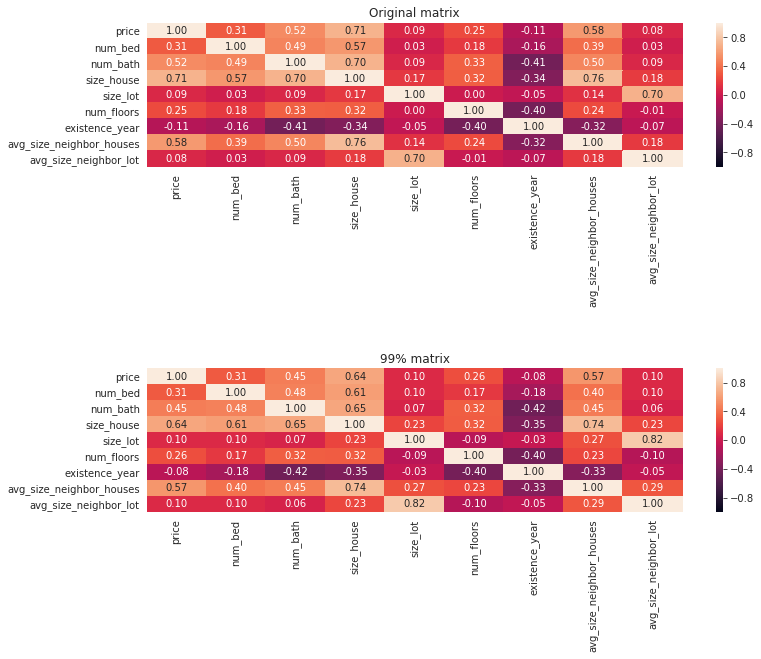

In [ ]:
#Mesmo empregando intervalos diferentes, nota-se que que as correlações positivas e negativas 
#mais fortes permanecem após o tratamento de outliers

plt.figure(figsize=(12, 9))

plt.subplot(3,1,1)

ax=sns.heatmap(
    df[param_num].corr(),
    vmin=-1, vmax=1, annot=True, fmt='.2f')

plt.title("Original matrix")

#################################

plt.subplot(3,1,3)
ax=sns.heatmap(
    df_99[param_num].corr(),
    vmin=-1, vmax=1, annot=True, fmt='.2f')
ax=plt.title("99% matrix")

plt.show()

<Figure size 648x432 with 0 Axes>

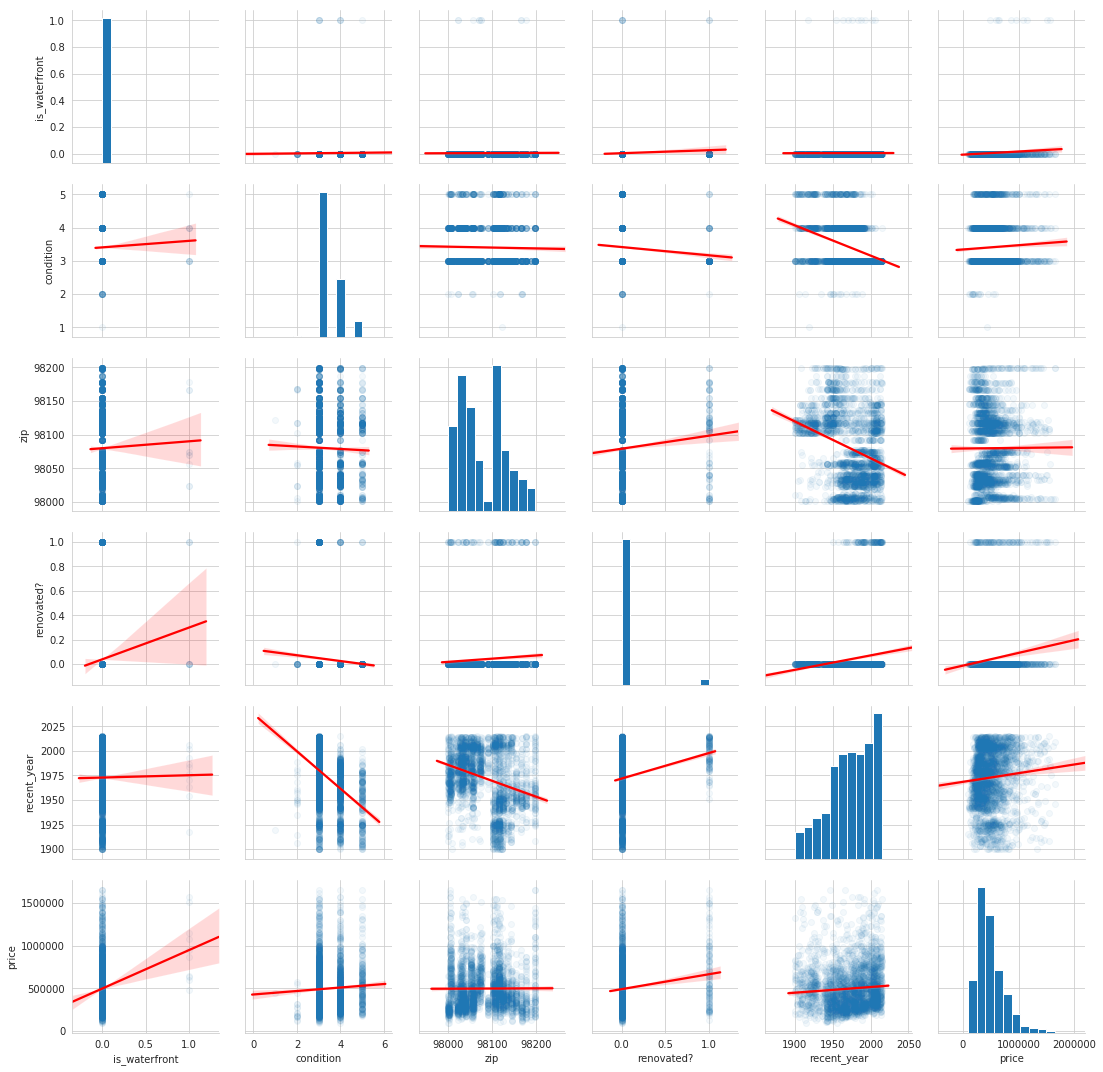

In [ ]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matriz com tratamento de outliers para variáveis Categoricas, 
#Na última linha, nota-se water_front e renovated possuem indicação de correlação positiva com price
#Condição do imóvel apresentou um leve aumento correlacional e Zip apresentou correlação levemente negativa

plt.figure(figsize=(9, 6))

g = sns.pairplot(
    pd.concat([df_99[param_cat],df_99["price"]],axis=1).sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}
)


<Figure size 648x432 with 0 Axes>

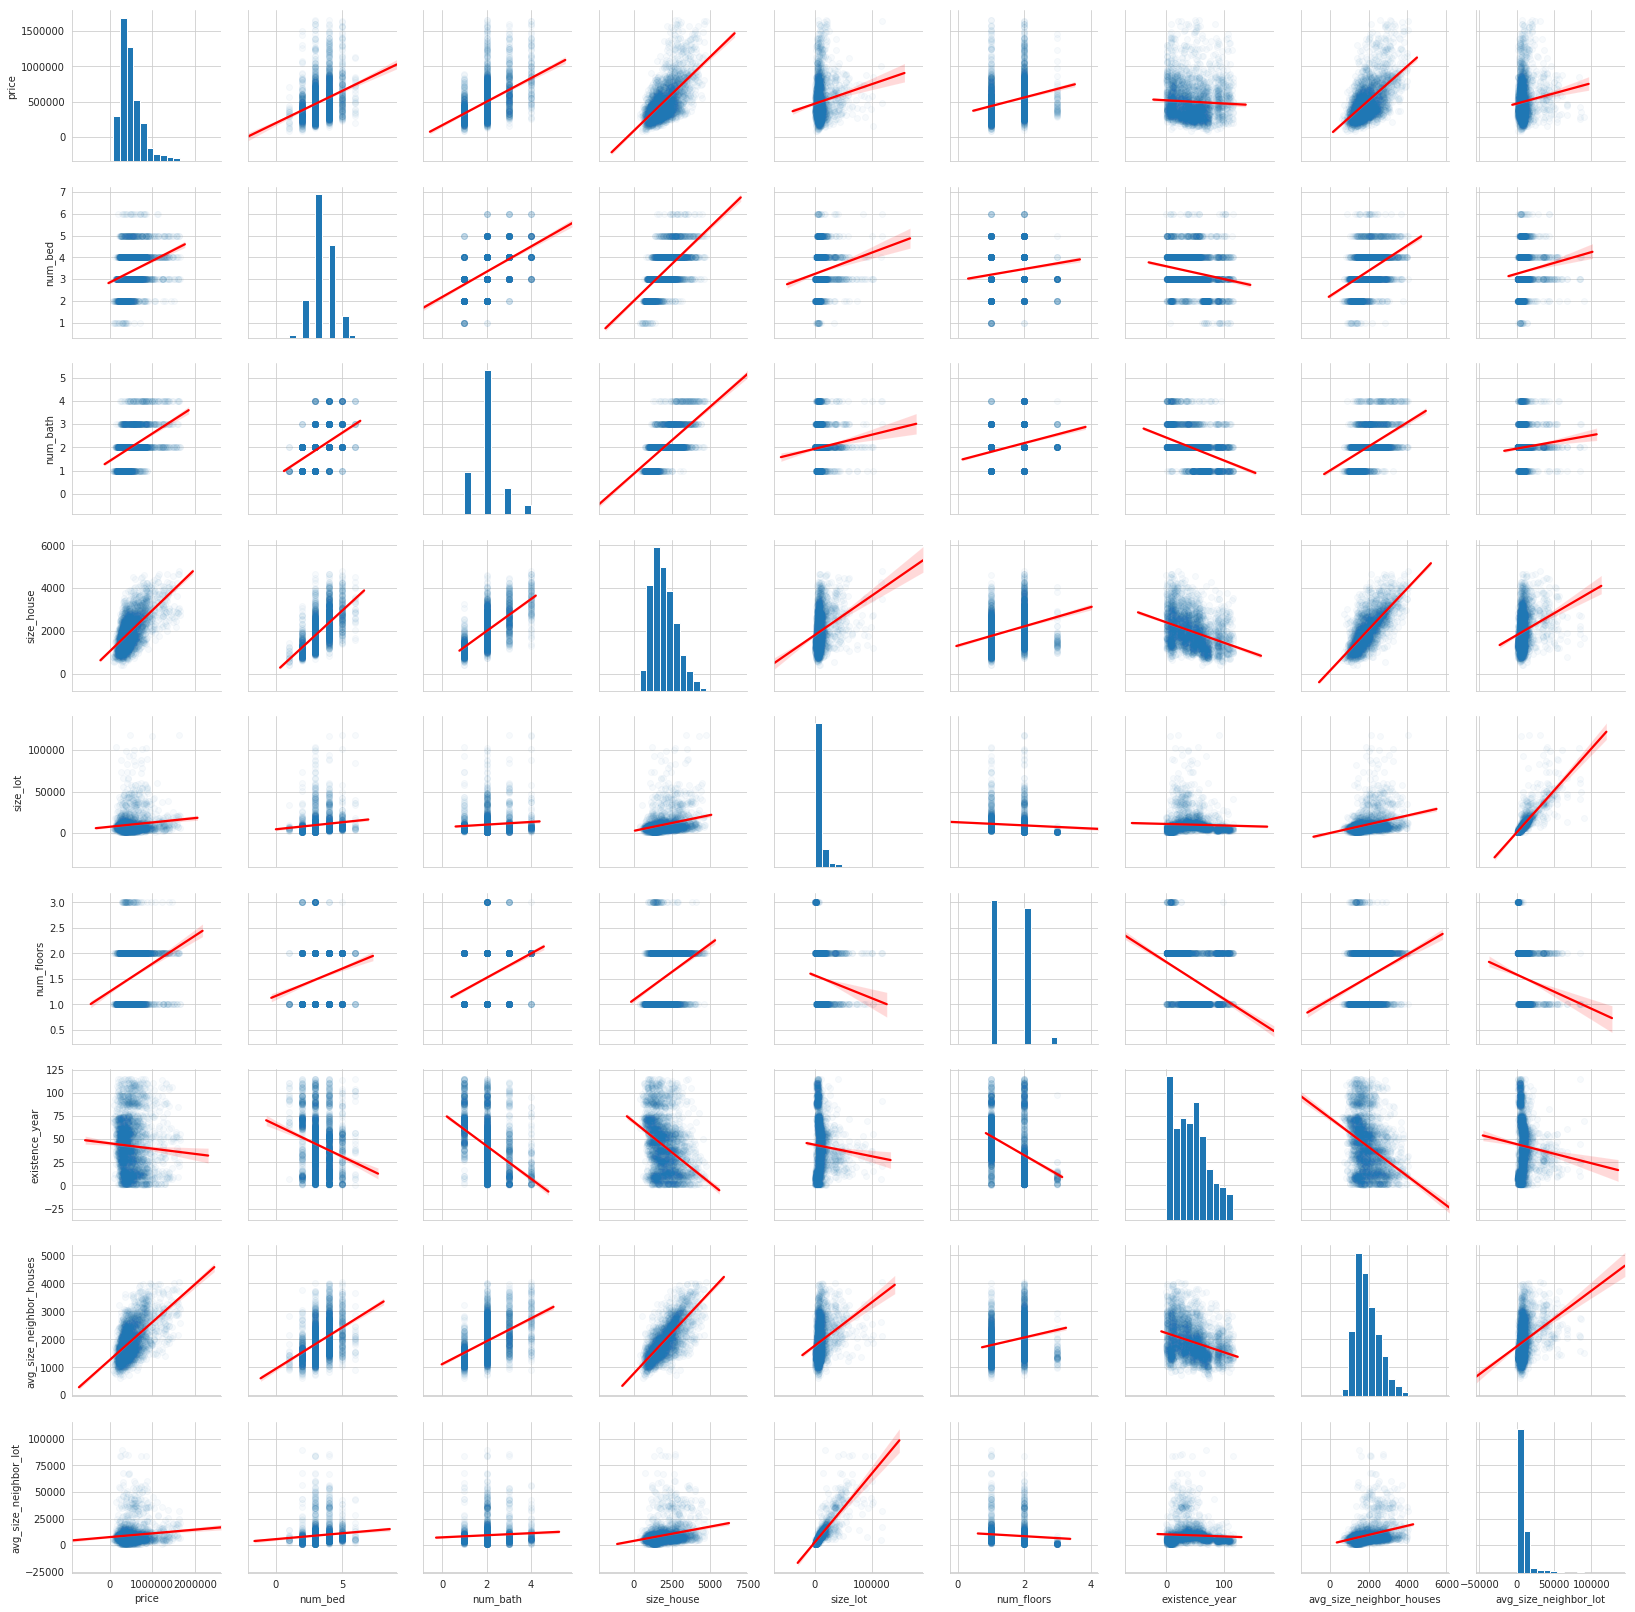

In [ ]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matriz com tratamento de outliers para variáveis Numéricas, ao contrário da anterior
#Na primeira coluna, nota-se que quase todas as variáveis apresentam indicação positiva ou negativa correlacional para "Price"

plt.figure(figsize=(9, 6))
g = sns.pairplot(
    df_99[param_num].sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.03}}
)

## Análise bivariada robustas discretizada de preço usando quartis 

O próposito desta análise é comparar 4 diferentes faixas de preço usando os perncetils tradicionais(0.25,0.5 e 0.75) com as outras variáveis. 

Parte-se como hipótese de que estas quatro categorias possuem comportamentos diferentes quanta as outras variáveis

Algumas perguntas emergem: 

* Com os atributos apresentados, consigo diferenciar entre essas 4 faixas de preço? 
* Se sim, no que elas diferenciam entre si? 
* essas diferenças são significativas? 

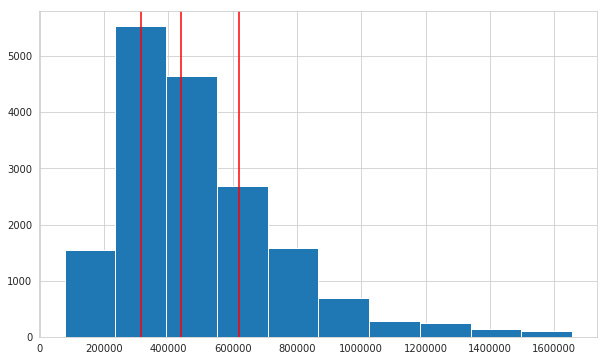

In [ ]:
#Ilustração visual via Histograma de corte para análise - quartis tradicionais

plt.figure(figsize=(10, 6))

df_99["price"].hist()

plt.axvline(x=df_99["price"].quantile(0.25),color="red")

plt.axvline(x=df_99["price"].quantile(0.5),color="red")

plt.axvline(x=df_99["price"].quantile(0.75),color="red")

In [ ]:
#Criação das quatro faixas de preço

df_99["price_class"]=df_99["price"].apply(
    lambda x : "A" if x > df_99["price"].quantile(0.75) else 
    ("B" if x < df_99["price"].quantile(0.75) and x> df_99["price"].quantile(0.5) else 
    ("C" if x < df_99["price"].quantile(0.5) and x> df_99["price"].quantile(0.25) else "D")))

In [ ]:
#Pode-se observar que as quatro faixas estão bem distribuidas em termos de contagem

df_99["price_class"].value_counts()

D    4421
C    4358
A    4345
B    4338
Name: price_class, dtype: int64

<Figure size 360x216 with 0 Axes>

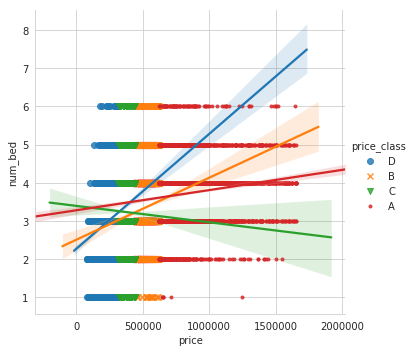

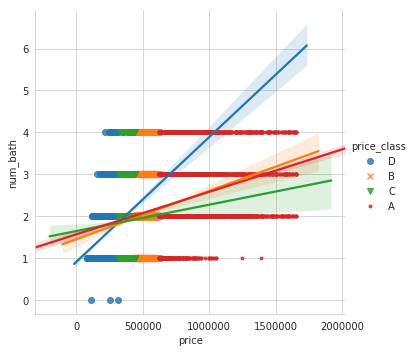

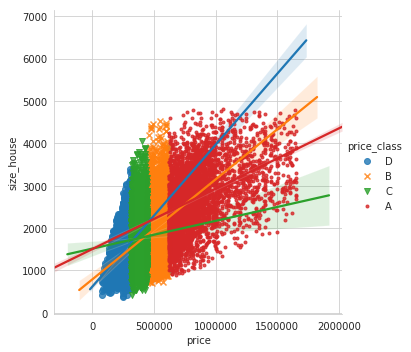

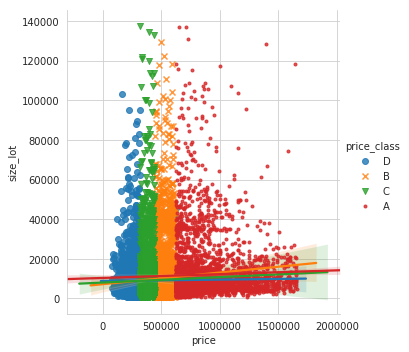

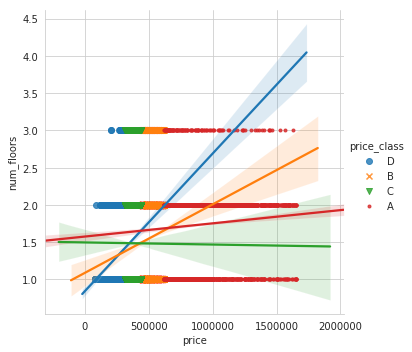

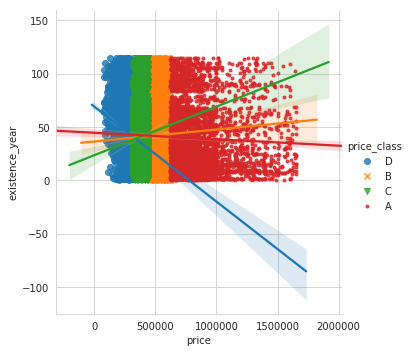

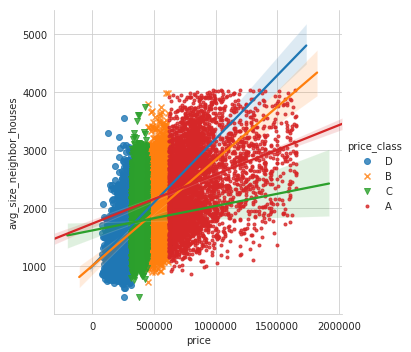

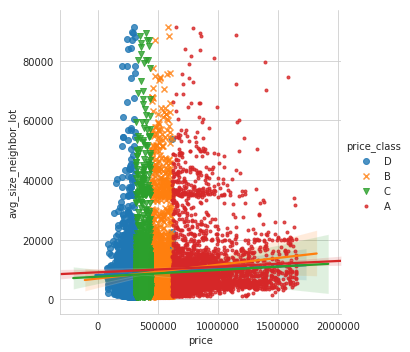

In [ ]:
#Na visualização abaixo, pode-se notar que todas as regressões apresentam inclinações diferentes, 
#exceto nas variáveis size_lot e avg_lot_size. Isto apresenta indícios de que 
#estas faixas de preço apresentam comportamentos diferentes entre elas

plt.figure(figsize=(5,3))
for feature in param_num[1:]:
  
  sns.lmplot(data=df_99,x="price",y=feature,hue="price_class",fit_reg=True, markers=["o", "x","v","."])
  
  

In [ ]:
#Teste estatístico de frequência usando a tabela de contigência via Chi-square para as variáveis categoricas investigadas 
#todas elas apresentaram p-value menor que 0.01 com nível de significância 99%.
#Isso quer dizer a hipótese nula de distribuição esperada é rejeitada, portanto elas possuem indicação de impacto dentro das faixas criadas

from scipy.stats import chi2_contingency

for feature in param_cat:  

    pd_chi=pd.crosstab(df_99.price_class,df_99[feature])
    g, p, dof, expctd = chi2_contingency(pd_chi)
  
    print("The Chisquare-test between Hit and Flop using frequency table of {} is {:03.3f} and p-value of {:03.3f}".format(feature,g,p))

The Chisquare-test between Hit and Flop using frequency table of is_waterfront is 105.344 and p-value of 0.000
The Chisquare-test between Hit and Flop using frequency table of condition is 266.721 and p-value of 0.000
The Chisquare-test between Hit and Flop using frequency table of zip is 12413.160 and p-value of 0.000
The Chisquare-test between Hit and Flop using frequency table of renovated? is 181.225 and p-value of 0.000
The Chisquare-test between Hit and Flop using frequency table of recent_year is 1758.962 and p-value of 0.000


In [ ]:
#Teste estatístico de ANOVA para as variáveis numéricas investigadas 
#todas elas apresentaram p-value menor que 0.01 com nível de significância 99%.
#Isso quer dizer a hipótese nula de distribuição esperada é rejeitada, portanto elas possuem indicação de impacto dentro das faixas criadas

import scipy.stats as stats


for feature in param_num[1:]:

    rvsA=df_99.loc[(df_99["price_class"]=="A"),feature]
  
    rvsB=df_99.loc[(df_99["price_class"]=="B"),feature]
  
    rvsC=df_99.loc[(df_99["price_class"]=="C"),feature]
  
    rvsD=df_99.loc[(df_99["price_class"]=="D"),feature]

    t,p=stats.f_oneway(rvsA,rvsB,rvsC,rvsD)
  
    print("The Anova-test between different PRICE CLASS using mean value of {} is {:03.3f} and p-value of {:03.3f}".format(feature,t,p))

The Anova-test between different PRICE CLASS using mean value of num_bed is 557.846 and p-value of 0.000
The Anova-test between different PRICE CLASS using mean value of num_bath is 1178.980 and p-value of 0.000
The Anova-test between different PRICE CLASS using mean value of size_house is 3290.530 and p-value of 0.000
The Anova-test between different PRICE CLASS using mean value of size_lot is 64.789 and p-value of 0.000
The Anova-test between different PRICE CLASS using mean value of num_floors is 473.648 and p-value of 0.000
The Anova-test between different PRICE CLASS using mean value of existence_year is 54.580 and p-value of 0.000
The Anova-test between different PRICE CLASS using mean value of avg_size_neighbor_houses is 2437.197 and p-value of 0.000
The Anova-test between different PRICE CLASS using mean value of avg_size_neighbor_lot is 55.504 and p-value of 0.000


# Modelagem

## Preparação de dados

The Shapiro-test of normality for price is 0.895 and p-value of 0.000
The Shapiro-test of normality for size_house is 0.965 and p-value of 0.000
The Shapiro-test of normality for size_lot is 0.538 and p-value of 0.000
The Shapiro-test of normality for recent_year is 0.952 and p-value of 0.000
The Shapiro-test of normality for existence_year is 0.952 and p-value of 0.000
The Shapiro-test of normality for avg_size_neighbor_houses is 0.953 and p-value of 0.000
The Shapiro-test of normality for avg_size_neighbor_lot is 0.578 and p-value of 0.000


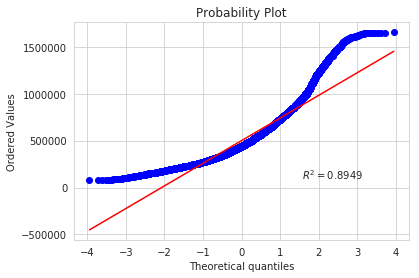

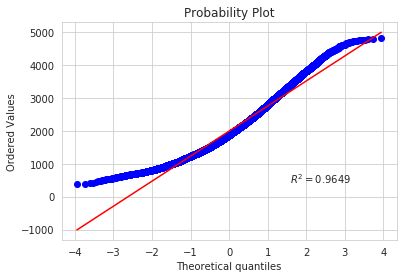

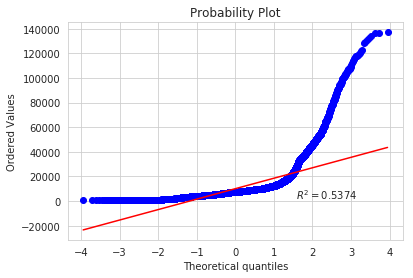

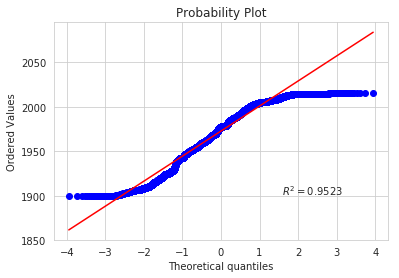

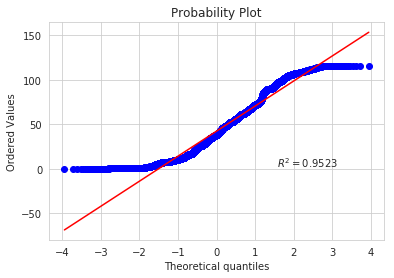

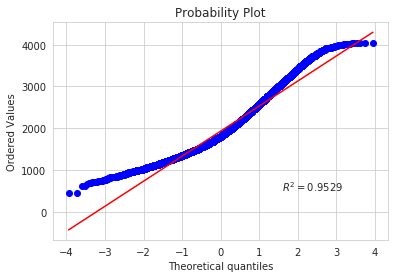

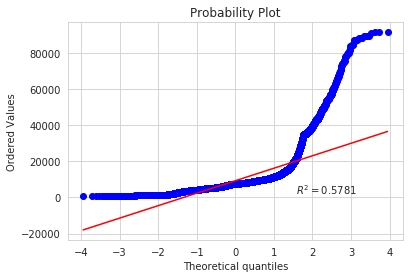

In [ ]:
#Efetuou-se teste de normalidade para todas as variáveis numéricas sem realizar nenhuma transformação 
#Segundo o teste de Shapiro, todas elas rejeitaram a condição de normalidade 
#Ou seja, nenhuma apresenta característica de normalidade

for position,feature in enumerate(["price","size_house","size_lot","recent_year","existence_year","avg_size_neighbor_houses","avg_size_neighbor_lot"]):  
  
    plt.figure(position)

    #stats.probplot(np.log(df_99[feature]), plot=plt)
    plt.title(feature)
    stats.probplot(df_99[feature], plot=plt,fit=True,rvalue=True)  
    t,p=stats.shapiro(df_99[feature])
    print("The Shapiro-test of normality for {} is {:03.3f} and p-value of {:03.3f}".format(feature,t,p))
    plt.plot() 

The Shapiro-test of normality for price is 0.998 and p-value of 0.000 after log transformation
The Shapiro-test of normality for size_house is 0.994 and p-value of 0.000 after log transformation
The Shapiro-test of normality for size_lot is 0.956 and p-value of 0.000 after log transformation
The Shapiro-test of normality for recent_year is 0.950 and p-value of 0.000 after log transformation
The Shapiro-test of normality for existence_year is 0.910 and p-value of 0.000 after log transformation
The Shapiro-test of normality for avg_size_neighbor_houses is 0.995 and p-value of 0.000 after log transformation
The Shapiro-test of normality for avg_size_neighbor_lot is 0.948 and p-value of 0.000 after log transformation


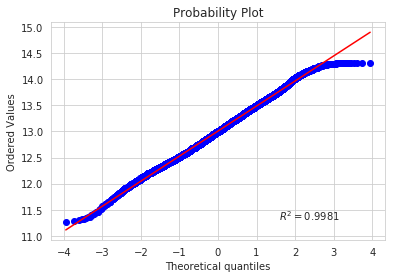

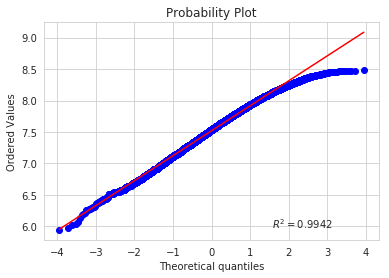

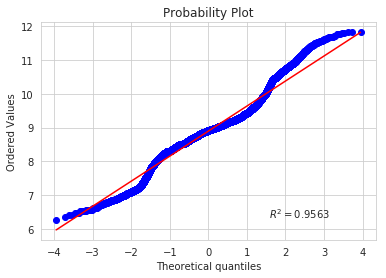

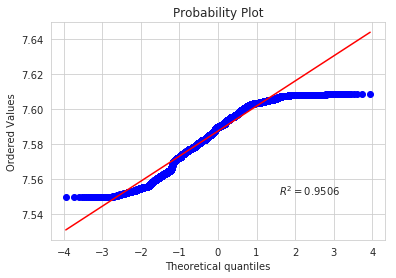

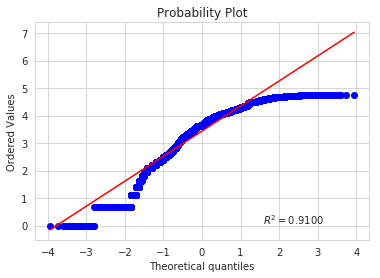

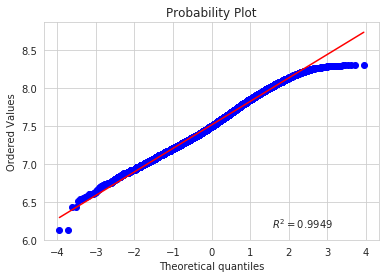

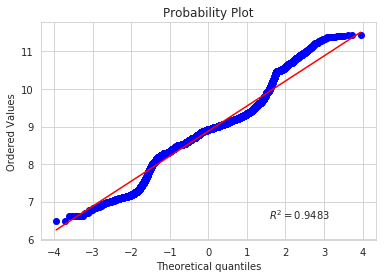

In [ ]:
#Aqui, efetuou-se também o teste de normalidade para todas as variáveis numéricas após realização transformação Log 
#(também se tentou com Box-cox transformation - mas resultados similares)
#Segundo o teste de Shapiro, todas elas rejeitaram a condição de normalidade 
#Ou seja, nenhuma apresenta característica de normalidade ainda que transformada
#No entanto, a distribuição apresentou melhoria visual significativa 


for position,feature in enumerate(["price","size_house","size_lot","recent_year","existence_year","avg_size_neighbor_houses","avg_size_neighbor_lot"]):  
  
    plt.figure(position)
    plt.title(feature)
    stats.probplot(np.log1p(df_99[feature]), plot=plt,fit=True,rvalue=True)
    t,p=stats.shapiro(np.log1p(df_99[feature]))
    print("The Shapiro-test of normality for {} is {:03.3f} and p-value of {:03.3f} after log transformation".format(feature,t,p))  
    plt.plot()

In [ ]:
#Transformação log-log das variáveis numéricas

for position,feature in enumerate(["price","size_house","size_lot","recent_year","existence_year","avg_size_neighbor_houses","avg_size_neighbor_lot"]):  
  
    df_99[feature] = np.log1p(df_99[feature])

In [ ]:
#Dada quantidade de variáveis com alto poder correlacional entre elas, corre-se o risco de heterodestacidade e data leak
#Com isso em mente, realizou a deletação de algumas variáveis que podem ser substituídas por outras, bem como variáveis que não
#serão utilizadas, tais como lat,long e price_class

var_drop=["recent_year","avg_size_neighbor_lot","avg_size_neighbor_houses","latitude","longitude","price_class"]

df_99_model=df_99.drop(columns=var_drop).copy()

## Pipeline

In [ ]:
#Nesta célula apresento o pipeline de dados empregado tendo em mente 3 pontos:
#Primeiro, padronização dos valores numéricos e dumificação das variáveis categóricas
#Segundo, apresentação dos modelos de predição - sendo do mais básico via Statsmodel,
#seguido por Lasso,Ridge,Elastic e Xgb
#Por fim, apresentação dos scores de predição, análises de resíduo e as variáveis mais importantes
#do modelo

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

# Prep para variaveis numericas

var_model_regress=["num_bed",
"num_bath",
"size_house",
"size_lot",
"num_floors",
"size_basement",
"existence_year"]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])


# Prep para variaveis categoricas

var_model_cat=["is_waterfront","condition","zip","renovated?"]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

var_model_cat=["is_waterfront","condition","zip","renovated?"]


#Processador via coluna

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, var_model_regress),
        ('cat', categorical_transformer, var_model_cat)])


#Processador para cada algoritmo

xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('XGB', XGBRegressor(n_estimators=1000,learning_rate=0.05))])


ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Ridge', Ridge())])

lasso = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Lasso', LassoCV(alphas = [1, 0.1, 0.001, 0.0005]))])

# parametersGrid = {"max_iter": [1, 5, 10],
#                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                     "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = pd.concat([df_99_model[var_model_regress],df_99[var_model_cat]],axis=1)
y = df_99_model["price"]

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.20,random_state=1)

## Análise dos resultados

In [ ]:
#Utilizando Statsmodel conjugando em GLM robust (modelo GLM de regressão que utilza quartis ao invés da média em seu modelo) apresentou
#no set de treino que todas as variáveis exceto size_basement, como variáveis com significância estatística suficiente para a Price

import statsmodels.api as sm
import statsmodels.formula.api as smf


df_99_model_robust = sm.RLM(train_y, train_X, M=sm.robust.norms.HuberT())
df_99_model_robust_results = df_99_model_robust.fit()
print(df_99_model_robust_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:                13969
Model:                            RLM   Df Residuals:                    13958
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 14 Sep 2019                                         
Time:                        18:20:59                                         
No. Iterations:                    31                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
num_bed           -0.0886      0.005    -18.

In [ ]:
#Apresenta-se os modelos utilizados e suas respectivas performance utilizando os datasets de test em cima do modelo

from sklearn.model_selection import train_test_split, GridSearchCV

X = pd.concat([df_99_model[var_model_regress],df_99[var_model_cat]],axis=1)
y = df_99_model["price"]

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.20,random_state=1)

ridge.fit(train_X, train_y)
print("Ridge model score: %.3f" % ridge.score(test_X, test_y))

lasso.fit(train_X, train_y)
print("Lasso model score: %.3f" % lasso.score(test_X, test_y))

xgb.fit(train_X, train_y)
print("XGB model score: %.3f" % xgb.score(test_X, test_y))

Ridge model score: 0.843
Lasso model score: 0.831
[18:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB model score: 0.836


## Hora de testar o modelo! com alguns exemplos

In [ ]:
print("Valor predito em U$ dólares {}".format(np.exp(xgb.predict(test_X[:10]))))

print("Valor real em U$ dólares {}".format(np.exp(test_y[:10].values)))

print("Diferença absoluta entre real e predito U$ dólares {}".format(np.abs(list(np.exp(xgb.predict(test_X[:5])) - np.exp(test_y[:5])))))

Valor predito em U$ dólares [326349.6  234583.8  691127.25 541880.   719088.5  715025.8  421047.72
 661049.3  340082.1  808610.9 ]
Valor real em U$ dólares [299001. 244001. 606001. 690001. 696951. 659501. 398001. 822001. 220001.
 869951.]
Diferença absoluta entre real e predito U$ dólares [ 27348.59375    9417.203125  85126.25     148121.        22137.5     ]


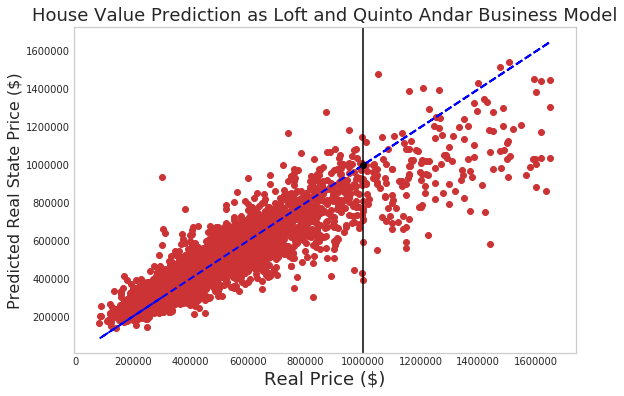

In [ ]:
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.grid()

Y = np.exp(xgb.predict(test_X))
X = np.exp(test_y).values


plt.plot(X,X,color="blue",linewidth=2.0,linestyle = '--')

plt.scatter(y=Y,x=X)
plt.title("House Value Prediction as Loft and Quinto Andar Business Model", fontsize=18)
plt.xlabel('Real Price ($)', fontsize=18)
plt.ylabel('Predicted Real State Price ($)', fontsize=16)
plt.plot(1000000, 1000000,marker='o', color='black')
plt.axvline(1000000,color='black')


No modelo Lasso pegou 11 variáveis e eliminou 0 variáveis


Text(0.5, 1.0, 'Valor dos coeficientes no modelo Lasso')

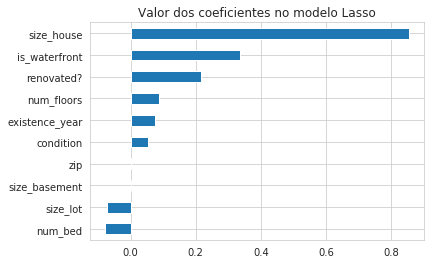

In [ ]:
#Para fins de verificação das variáveis e seu impacto, no modelo Lasso realizou a 
#decupagem das coeficientes gerados para análise fora do pipe
#Pode-se observar que as variáveis size_house,is_waterfront e renovated?(sim ou não) são os três principais contribuintes positivos para Price
#Já Size_lot e num_bed contribuiram negativamente, ainda que valor no limite de zero.

#Resumidamente, o modelo estatístico seria:

#price = (0.855149 * size_house)+(0.336951 * is_waterfront )+
#(0.217367 * renovated?)+(0.087856 * num_floors)+
#(0.074515 * existence_year)+(0.069184 * num_bath)+(0.053192 * condition)+
#(0.000599 * zip)+(0.000005 * size_basement )+(0.071822 * size_lot)+(0.079467 * num_bed)


lasso_model =LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(train_X, train_y)

coef = pd.Series(lasso_model.coef_, index = train_X.columns)

print("No modelo Lasso pegou " + str(sum(coef != 0)) + " variáveis e eliminou " +  str(sum(coef == 0)) + " variáveis")

coef_limp = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(5)])

coef_limp.plot(kind = "barh")
plt.title("Valor dos coeficientes no modelo Lasso")

The Shapiro-test of normality for residuals is 0.948 and p-value of 0.000


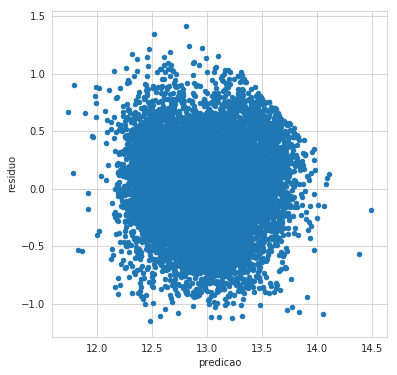

In [ ]:
#Na análise de resíduo, diferença entre o valor predito e o valor y teste, nota-se que ela está distribuida aleatoriamente
#Indicando distribuição normal dos resultados e assim, pode-se dizer que o modelo possui poder explicativo satisfatório
#No entanto, o teste de Shapiro rejeita a hipótese de normalidade dos resíduos. 
#Dessa forma, ainda que o modelo apresente pontuação razoavelmente alto de 84~85, ainda há pontos para serem melhorados afim de melhorar a 
#distribuicao residual)


plt.rcParams['figure.figsize'] = (6.0, 6.0)

predicao = pd.DataFrame({"predicao":lasso_model.predict(train_X), "true":train_y})
predicao["residuo"] = predicao["true"] - predicao["predicao"]
predicao.plot(x = "predicao", y = "residuo",kind = "scatter")

t_p=stats.shapiro(predicao["residuo"])

print("The Shapiro-test of normality for residuals is {:03.3f} and p-value of {:03.3f}".format(t,p))

## Visualização Gráfica e Modelo de Negócio LOFT

In [ ]:
#Visualização gráfica

y=df["price"]

X=df[["latitude","longitude"]]

from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(min_samples_leaf=100,max_leaf_nodes=50)
dt.fit(X,y)

cluster = dt.apply(X)

In [ ]:
import geopandas

df_map = df[["price","latitude","longitude"]]

df_map["cluster"] = cluster

gdf = geopandas.GeoDataFrame(
    df_map, geometry=geopandas.points_from_xy(df_map.longitude, df_map.latitude))

gdf.sort_values("price",ascending=False).head(5)

,price,latitude,longitude,cluster,geometry
6178,7700000,47.629773,-122.322701,70,POINT (-122.3227007 47.62977314)
3330,7062500,47.649976,-122.213508,34,POINT (-122.2135076 47.64997579)
7894,6885000,47.630468,-122.240432,33,POINT (-122.240432 47.63046819)
3755,5570000,47.628883,-122.233464,33,POINT (-122.2334638 47.62888314)
1228,5350000,47.623152,-122.220468,33,POINT (-122.2204683 47.62315199)


No handles with labels found to put in legend.


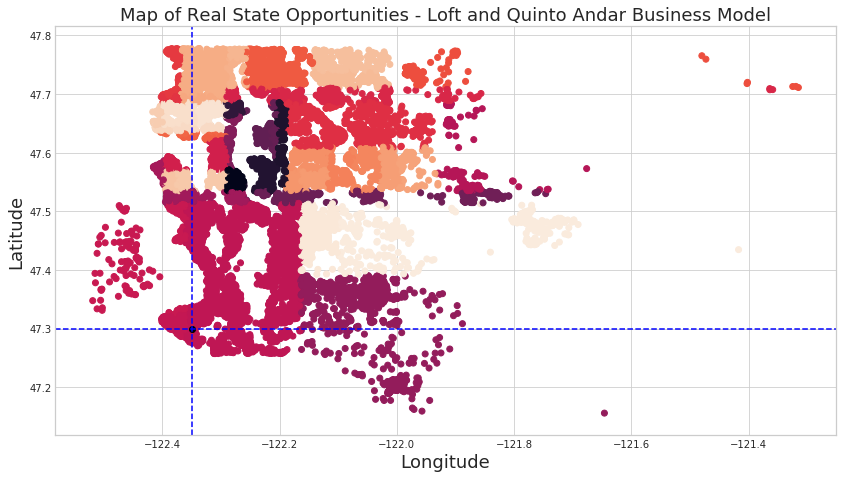

In [ ]:
plt.rcParams['figure.figsize'] = (14.0, 9.0)
sns.set_style("whitegrid")
sns.set_palette("Set1", 8, .75)


gdf.plot("cluster")

plt.title("Map of Real State Opportunities - Loft and Quinto Andar Business Model",fontsize=18)

plt.plot(-122.35, 47.3,marker='o', color='black')
plt.axvline(-122.35,color='blue',linestyle = '--')
plt.axhline(47.3,color='blue',linestyle = '--')


plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

plt.legend()

# Pontos de discussão e melhoria do estudo

Alguns pontos importantes que chamaram atenção neste estudo quanto aos dados e pontos de melhoria que podem ser realizados futuramente:

* Dada as limitações de tempo, não foi realizado otimização dos parâmetros
* A variável condição do imóvel não apresentou grande impacto no preço. No bom senso ela deveria ter um impacto razoavelmente maior no estudo - deve-se atentar em como foi realizado a coleta desse dado
* Não foi empregado Lat e Long neste estudo, uma possível aproximação seria transformação das 4 ou 5 primeiros números e transformá-los em categorias. O mesmo poderia ser feito para zip, e assim diminuir o número de níveis. No estudo havia 70 diferentes zips, considerando apenas as 4 primeiras letras poderia diminuir para 16 níveis.
* Por fim, diferentes níveis de intervalo de confiança para tratamento de outliers podem ser empregados afim de mensurar sua resposta quanto ao Score dos modelos de predição